In [339]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

%matplotlib inline
#data from https://github.com/zygmuntz/goodbooks-10k
ratings = pd.read_csv( 'data/ratings.csv' )
to_read = pd.read_csv( 'data/to_read.csv' )
books = pd.read_csv( 'data/books.csv' )
tags = pd.read_csv( 'data/tags.csv' )
book_tags = pd.read_csv( 'data/book_tags.csv')

pd.set_option("display.precision", 2)

In [340]:
print ('books-->', books.shape , 'ratings-->' ,ratings.shape)
ratings.describe()
book_tags.tail()

books--> (10000, 23) ratings--> (5976479, 3)


,goodreads_book_id,tag_id,count
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7
999911,33288638,27939,7


In [341]:

books.columns.values
books_summary = books[['book_id','title', 'authors', 'original_publication_year','average_rating', 'work_ratings_count','work_text_reviews_count']]
books_summary.describe()

,book_id,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count
count,10000.00,9979.00,10000.00,1.00e+04,10000.00
mean,5000.50,1981.99,4.00,5.97e+04,2919.96
std,2886.90,152.58,0.25,1.68e+05,6124.38
min,1.00,-1750.00,2.47,5.51e+03,3.00
25%,2500.75,1990.00,3.85,1.54e+04,694.00
50%,5000.50,2004.00,4.02,2.38e+04,1402.00
75%,7500.25,2011.00,4.18,4.59e+04,2744.25
max,10000.00,2017.00,4.82,4.94e+06,155254.00


In [342]:
#Show distribution of users based on number of books rated
ratings_per_user = ratings.groupby('user_id').user_id.apply(lambda x: len(x))
#.user_id.apply( lambda x: len( x ))
#ratings_per_user.hist(bins=40)
#ratings_per_user.describe()
#ratings['u'].hist(by=df['ser'])
#ratings.columns.values


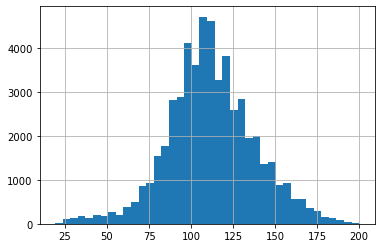

In [343]:
ratings_per_user.sort_values().hist(bins=40)

The dataset contains only users who have rated at least 19 books and average user has rated 111 books. The max user has rated 200 books implying reading and rating a book a month for 16 years :-)

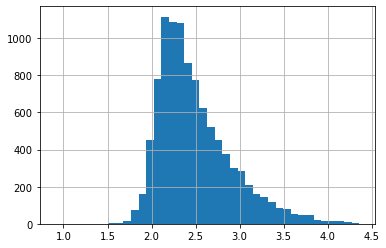

In [344]:
#ratings.boxplot(column='rating')
#ratings.rating.describe()
ratings_per_book = ratings.groupby('book_id').book_id.apply( lambda x: np.log10(len( x )))
#ratings_per_book.head()
#ratings_per_book.plot.density()
ratings_per_book.sort_values().hist(bins=40)

Each book has at least 8 ratings and average book has 248 ratings from a user. Note: User is somebody who has rated at least 19 books.

# The Books with most ratings are:

In [345]:
book_id = ratings_per_book.sort_values(ascending=False).index.tolist()[:10]
popularity_most_ratings = books.iloc[book_id].original_title.to_list()
print (*popularity_most_ratings, sep='\n')

Harry Potter and the Philosopher's Stone
Twilight
The Great Gatsby
To Kill a Mockingbird
The Fault in Our Stars
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Order of the Phoenix
 The Fellowship of the Ring
Harry Potter and the Goblet of Fire
The Catcher in the Rye


# The Books with best average ratings
Note: ratings only from user who has rated at least 19 books.

Ranma ½, Vol. 1 (Ranma ½ (US 2nd), #1)
Wired (Wired, #1)
Crewel (Crewel World, #1)
Funny in Farsi: A Memoir of Growing Up Iranian in America
The Case-Book of Sherlock Holmes
Boys Over Flowers: Hana Yori Dango, Vol. 1 (Boys Over Flowers, #1)
Cloudstreet
Avatar: The Last Airbender (The Promise, #1)
Skeleton Key (Alex Rider, #3)
Dreamland


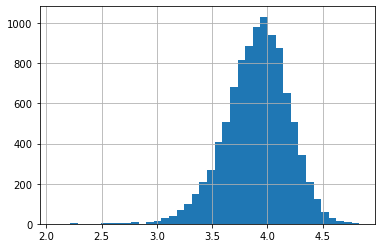

In [346]:

avg_ratings_per_book = ratings.groupby('book_id').rating.mean()
avg_ratings_per_book.hist(bins=40)
high_rated_books = avg_ratings_per_book.sort_values(ascending=False).index.tolist()[:10]
popularity_avg_ratings = books.iloc[high_rated_books].title.to_list()
print (*popularity_avg_ratings, sep='\n')

In [347]:
books_summary_expert_rating= books_summary.merge( avg_ratings_per_book, on = 'book_id')
books_summary_expert_rating["deviation"] = books_summary_expert_rating["rating"]-books_summary_expert_rating["average_rating"]
books_summary_expert_rating["ratings/review_count"] = books_summary_expert_rating["work_ratings_count"]/books_summary_expert_rating["work_text_reviews_count"]
books_summary_expert_rating.describe()
#book_classics = books_summary_expert_rating[books_summary_expert_rating['original_publication_year'] < 1940]
#book_modern = books_summary_expert_rating[books_summary_expert_rating['original_publication_year'] >= 1940]
#avg_expert_rating_classics = book_classics['average_rating'].mean()
#avg_expert_rating_modern = book_modern['average_rating'].mean()
#print (avg_expert_rating_classics, avg_expert_rating_modern)
#underrated books
#book_classics.sort_values(by=['original_publication_year'])[240:260]
#book_classics.sort_values(by=['work_text_reviews_count'])


,book_id,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,rating,deviation,ratings/review_count
count,10000.00,9979.00,10000.00,1.00e+04,10000.00,10000.00,10000.00,10000.00
mean,5000.50,1981.99,4.00,5.97e+04,2919.96,3.90,-0.10,33.59
std,2886.90,152.58,0.25,1.68e+05,6124.38,0.29,0.10,75.06
min,1.00,-1750.00,2.47,5.51e+03,3.00,2.08,-0.93,3.65
25%,2500.75,1990.00,3.85,1.54e+04,694.00,3.73,-0.15,11.51
50%,5000.50,2004.00,4.02,2.38e+04,1402.00,3.92,-0.09,19.72
75%,7500.25,2011.00,4.18,4.59e+04,2744.25,4.10,-0.04,35.09
max,10000.00,2017.00,4.82,4.94e+06,155254.00,4.83,0.51,3702.00


# Genres

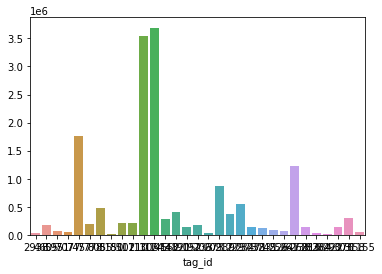

In [455]:
genres = ["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics", "Comics",
"Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction", "Gay and Lesbian", "Graphic Novels", 
"Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", 
"Paranormal", "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", 
"Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]
genre_lower = list(map(lambda x:x.lower(), genres))
pat = r'+$|'.join(genre_lower)
considered_tags = tags[tags.tag_name.str.match(pat)]
considered_tags_id = considered_tags.tag_id.tolist()
considered_book_tags = book_tags[book_tags.tag_id.isin(considered_tags_id)]

genres_count = considered_book_tags.groupby('tag_id')["count"].sum().sort_values()

#considered_book_tags
popular_tags_id = genres_count.sort_values(ascending=False).index.tolist()[:10]

#genres_count.head()
#print ('top 10 popular tags:'+repr(tags.iloc[popular_tags_id].tag_name.tolist()))
#print (popular_tags_id)
#tags[tags.tag_id==11743]
sns.barplot(x=genres_count.index, y=genres_count.values)    
#ratings_per_book = ratings.groupby('book_id').book_id.apply( lambda x: np.log10(len( x )))
#print (pat)
#print(genre_lower)
#book_tags.head() #book_id, tag_id, count
#tags[tags.tag_id==30574] #tag_id, tag_name #tags[(tags.tag_name=="art")|(tags.tag_name=="crime")]
#book_classics[book_classics['authors'].str.contains('|'.join(authors))]

In [349]:
#books_summary_expert_rating.sort_values(by=['ratings/review_count','rating','work_text_reviews_count']).head(10)
#books_summary_expert_rating.sort_values(by=['work_text_reviews_count'],ascending=False).head(10)
#books_summary_expert_rating.sort_values(by=['rating'],ascending=False).head(10)
#books_summary_expert_rating.sort_values(by=['rating']).head(10)
#books_summary_expert_rating.sort_values(by=['work_ratings_count'],ascending=False).head(10)
#books_summary_expert_rating.sort_values(by=['deviation'],ascending=True).head(10)

,book_id,title,authors,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,rating,deviation,ratings/review_count
7635,7636,Of Course I Love You...! Till I Find Someone B...,"Durjoy Datta, Maanvi Ahuja",2008.0,3.21,9661,301,2.28,-0.93,32.10
4044,4045,Half Girlfriend,Chetan Bhagat,2014.0,3.16,27146,2067,2.25,-0.91,13.13
9344,9345,Diary ng Panget,"HaveYouSeenThisGirL, Jan Irene Villar",2013.0,4.40,7045,401,3.55,-0.85,17.57
4990,4991,Can Love Happen Twice?,Ravinder Singh,2011.0,3.31,16172,673,2.46,-0.85,24.03
9704,9705,The Lake (The Lake Trilogy #1),AnnaLisa Grant,2013.0,3.75,9517,562,2.96,-0.79,16.93
5542,5543,Addicted,Zane,1998.0,4.26,15180,940,3.52,-0.74,16.15
2748,2749,I Too Had a Love Story,Ravinder Singh,2007.0,3.64,29161,1616,2.92,-0.72,18.05
9761,9762,Rich Dad's Guide to Investing: What the Rich I...,"Robert T. Kiyosaki, Sharon L. Lechter",2000.0,3.94,8619,232,3.23,-0.71,37.15
5705,5706,حبيبتي بكماء,محمد السالم,2013.0,3.30,13439,1675,2.63,-0.67,8.02
33,34,"Fifty Shades of Grey (Fifty Shades, #1)",E.L. James,2011.0,3.67,1436818,75437,3.09,-0.58,19.05


The following compilation of authors and books is recommended by Mortimer Adler's reading list from the book 'How to Read'. 
Several Authors are not in dataset as they may not have enough ratings/reviews. Mostly Scientific Works.
Furthermore, several classics from eastern civilization are absent and the list should be extended.

In [350]:
#Classics in dataset recommended by Mortimer Adler's reading list. 
#Authors

authors = ['Homer', 'Aeschylus', 'Sophocles', 'Herodotus', 'Euripides', 'Thucydides', 
           'Hippocrates', 'Aristophanes', 'Plato', 'Aristotle', 'Epicurus', 'Euclid', 'Archimedes', 'Perga', 'Cicero', 
           'Lucretius', 'Virgil', 'Horace', 'Livy', 'Ovid', 'Plutarch', 'Tacitus', 'Gerasa', 'Epictetus', 'Ptolemy', 
           'Lucian', 'Aurelius', 'Galen', 'Plotinus', 'Augustine', 'Aquinas', 'Alighieri', 'Chaucer', 'Vinci', 
           'Machiavelli', 'Erasmus', 'Copernicus', 'More', 'Luther', 'Rabelais', 'Calvin', 'Montaigne', 'Gilbert', 
           'Cervantes', 'Spenser', 'Bacon', 'Shakespeare', 'Galilei', 'Kepler', 'Harvey', 'Hobbes', 'Descartes', 'Milton', 
           'Molière', 'Pascal', 'Huygens', 'Spinoza', 'Locke', 'Racine', 'Newton', 'Leibniz', 'Defoe', 'Swift', 
           'Congreve', 'Berkeley', 'Pope', 'Montesquieu', 'Voltaire', 'Fielding', 'Johnson', 'Hume', 'Rousseau', 
           'Sterne', 'Smith', 'Kant', 'Gibbon', 'Boswell', 'Lavoisier', 'Madison', 'Bentham', 'Goethe', 'Fourier', 
           'Hegel', 'Wordsworth', 'Coleridge', 'Austen', 'Clausewitz', 'Stendhal', 'Byron', 'Schopenhauer', 'Faraday', 
           'Lyell', 'Comte', 'Balzac', 'Emerson', 'Hawthorne', 'Tocqueville', 'Mill', 'Darwin', 'Dickens', 'Bernard', 
           'Thoreau', 'Marx', 'Eliot', 'Melville', 'Dostoevsky', 'Flaubert', 'Ibsen', 'Tolstoy', 'Twain', 
           'James', 'James', 'Nietzsche', 'Poincare', 'Freud', 'Shaw', 'Planck', 'Bergson', 'Dewey', 'Whitehead', 
           'Santayana', 'Lenin', 'Proust', 'Russell', 'Mann', 'Einstein', 'Joyce', 'Maritain', 'Kafka', 'Toynbee', 
           'Sartre', 'Solzhenitsyn']

classics = pd.read_csv( 'data/classic.csv' )

rated_classic_authors = classics['authors'].tolist()
classics.describe()

,book_id,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,rating,deviation
count,204.00,204.00,204.00,2.04e+02,204.00,204.00,204.00
mean,4003.16,1527.23,3.88,1.11e+05,2555.81,3.82,-0.06
std,3036.06,722.71,0.20,2.39e+05,4575.33,0.21,0.06
min,10.00,-762.00,3.09,9.75e+03,57.00,3.09,-0.23
25%,1129.50,1600.75,3.76,1.60e+04,552.00,3.70,-0.10
50%,3597.00,1833.50,3.89,3.19e+04,930.00,3.81,-0.06
75%,6445.25,1881.25,4.01,9.08e+04,2628.50,3.94,-0.03
max,9995.00,1962.00,4.55,2.19e+06,49152.00,4.53,0.18


In [351]:
unrated_classic_authors = []
#print (rated_classic_authors)

for author in authors:
    if not any(author in s for s in rated_classic_authors):
        unrated_classic_authors.append(author)

print ('number of unrated classic authors in data set: '+ repr(len(unrated_classic_authors)))
print (unrated_classic_authors)

number of unrated classic authors in data set: 56
['Hippocrates', 'Epicurus', 'Euclid', 'Archimedes', 'Perga', 'Cicero', 'Lucretius', 'Horace', 'Livy', 'Plutarch', 'Tacitus', 'Gerasa', 'Epictetus', 'Ptolemy', 'Lucian', 'Galen', 'Plotinus', 'Aquinas', 'Erasmus', 'Copernicus', 'Luther', 'Calvin', 'Montaigne', 'Bacon', 'Galilei', 'Kepler', 'Harvey', 'Pascal', 'Huygens', 'Racine', 'Newton', 'Leibniz', 'Congreve', 'Berkeley', 'Pope', 'Montesquieu', 'Boswell', 'Lavoisier', 'Bentham', 'Fourier', 'Wordsworth', 'Clausewitz', 'Schopenhauer', 'Faraday', 'Lyell', 'Comte', 'Dostoevsky', 'Poincare', 'Planck', 'Bergson', 'Dewey', 'Whitehead', 'Santayana', 'Lenin', 'Maritain', 'Toynbee']


In [352]:
classics["ratings/review_count"] = classics["work_ratings_count"]/classics["work_text_reviews_count"]
classics.sort_values(by=['ratings/review_count','rating','work_text_reviews_count']).head(10)

,book_id,title,authors,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,rating,deviation,ratings/review_count
149,6302,Lady Susan,"Jane Austen, Robert William Chapman",1871.0,3.56,20969,2047,3.51,-0.05,10.24
100,3508,"Swann's Way (In Search of Lost Time, #1)","Marcel Proust, Simon Vance, Lydia Davis",1913.0,4.14,31697,2371,4.02,-0.12,13.37
174,7997,Washington Square,"Henry James, Michael Cunningham",1880.0,3.67,14611,1068,3.63,-0.04,13.68
68,1878,The Turn of the Screw,Henry James,1898.0,3.45,66011,4401,3.41,-0.04,15.00
181,8471,Pudd'nhead Wilson,Mark Twain,1893.0,3.74,13549,854,3.72,-0.02,15.87
143,6104,Daisy Miller,Henry James,1878.0,3.36,20939,1279,3.34,-0.02,16.37
107,3755,Bartleby the Scrivener,Herman Melville,1853.0,3.90,31730,1915,3.85,-0.05,16.57
195,9455,The Old Curiosity Shop,"Charles Dickens, Norman Page",1840.0,3.75,13299,792,3.72,-0.03,16.79
164,7416,"The Life and Opinions of Tristram Shandy, Gent...","Laurence Sterne, Melvyn New",1767.0,3.74,15954,939,3.58,-0.16,16.99
146,6190,The Pickwick Papers,Charles Dickens,1837.0,3.82,20011,1175,3.87,0.05,17.03


# Visualization
Try out diffent plots for comparing the control set of all books and books from all classic authors.

It shows that
- 56 of 129 classic authors are not in dataset of books. The dataset can be scraped for 2020.
- The classic books have average rating(3.82) less than control set (3.90). Note: This is for average rating from users of rate frequently. The average rating from all users for classics (3.88) is less than control set (4.0)
- The users who rate frequently tend to give lower ratings.
- Out of 10,000 books in control set only 212 are written by classic authors.
- The standard deviation for classics(.21) is less than control set(.29)
- For classics, one review has been given for every 44 ratings. Whereas for control set, one review has been given for every 34 ratings.

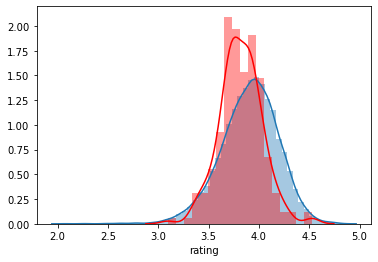

In [353]:






#t.violinplot(column=['average_rating', 'rating'])
sns.distplot(books_summary_expert_rating["rating"])
sns.distplot(classics["rating"],color="red")

#t["rating"].plot.kde()
#import matplotlib.pyplot as plt
#fig = plt.figure()
#for frame in [t,books_summary_expert_rating]:
#    plt.hist(frame['average_rating'], normed=True, alpha=0.5)

#plt.show()

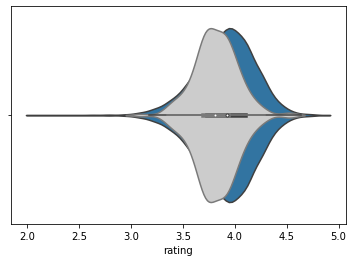

In [354]:
#sns.stripplot(x=books_summary_expert_rating["rating"])
#sns.stripplot(x=classics["average_rating"],color=".8")
sns.violinplot(x=books_summary_expert_rating["rating"])
sns.violinplot(x=classics["rating"],color=".8")

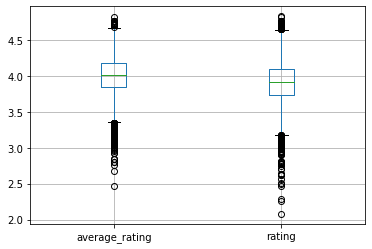

In [355]:
books_summary_expert_rating.boxplot(column=['average_rating', 'rating'])

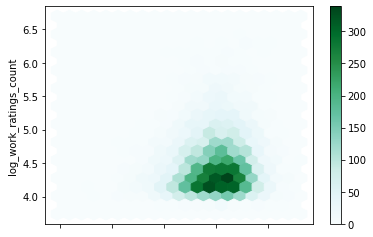

In [356]:
books_summary_expert_rating['log_work_ratings_count'] = np.log10(books_summary_expert_rating['work_ratings_count'])
books_summary_expert_rating.plot.hexbin(x='average_rating',
                      y='log_work_ratings_count', gridsize=20)

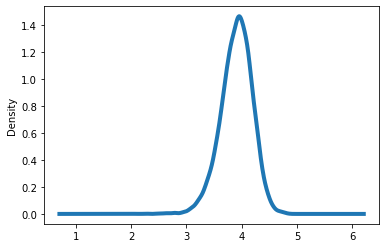

In [357]:
books_summary_expert_rating.rating.plot.density(linewidth=4)

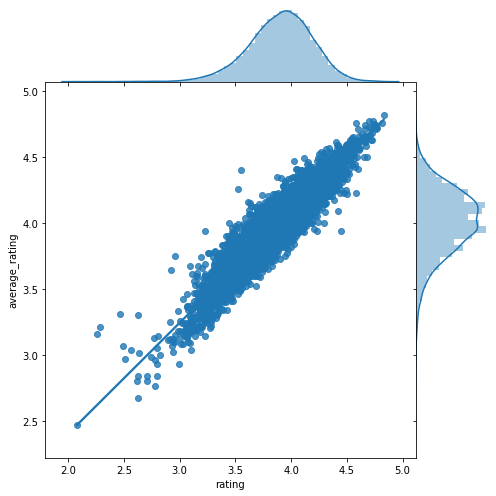

In [358]:
x1 = books_summary_expert_rating['rating']
x2 = books_summary_expert_rating['average_rating']
sns.jointplot(x1, x2, kind="reg", height=7, space=0)